In [22]:
# made by Gibeom LEE, HI LAB
# csv파일의 데이터 일부를 잘라내어 새로운 csv 파일로 추출합니다.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

max value: 14.9
min value: -0.0


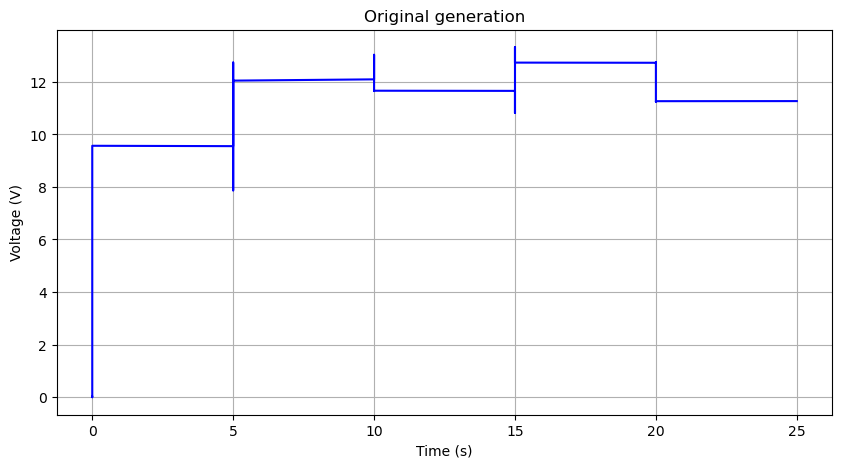

In [14]:
# fp는 업로드 된 파일, lp는 컴퓨터 내 파일. r주소
file_path = "data/0M teng 2.csv"
local_path = r"c:\Users\limye\OneDrive - gachon.ac.kr\HI Lab\0. Projects\0. On going\1. DC GENERATOR\2. 피규어\mock-up\250406\touch durability.csv"


# file path 불러오기
#df = pd.read_csv(file_path, header=None, skiprows=30)
# local path 불러오기
df = pd.read_csv(local_path, header=None, skiprows=30)

df.iloc[:30, 1] = np.nan
df.columns = ["Time", "Current"]

# 데이터 형식 변환...글자 -> NaN
df["Time"] = pd.to_numeric(df["Time"], errors='coerce')
df["Current"] = pd.to_numeric(df["Current"], errors='coerce')

print(f"max value: {df.iloc[:, 1].max(skipna=True):.1f}")
print(f"min value: {df.iloc[:, 1].min(skipna=True):.1f}")

plt.figure(figsize=(10, 5))
plt.plot(df.iloc[:, 0], df.iloc[:, 1], label="AC current", color='b')
plt.xlabel("Time (s)")
plt.ylabel("Voltage (V)")
plt.title("Original generation")
#plt.ylim(-1, 9)
#plt.legend()
plt.grid(True)
plt.show()

Filtered data saved at: c:\Users\limye\OneDrive - gachon.ac.kr\HI Lab\0. Projects\0. On going\1. DC GENERATOR\2. 피규어\mock-up\250406\cut_touch durability.csv


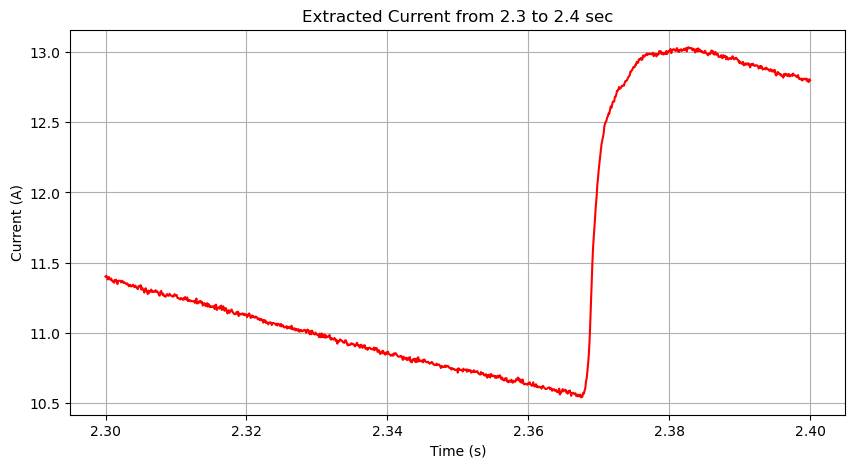

In [12]:
# 필터링된 데이터 생성
time_range = (2.3, 2.4)  # 단위: 초 ########### MODIFY HERE
df_filtered = df[(df.iloc[:, 0] >= time_range[0]) & (df.iloc[:, 0] <= time_range[1])]

# 기존 local_path에서 폴더 경로 및 원래 파일명 추출
folder_path = os.path.dirname(local_path)
original_filename = os.path.basename(local_path)  # 원래 파일명 가져오기
filtered_file_name = f"cut_{original_filename}"  # "extracted_" 추가
filtered_file_path = os.path.join(folder_path, filtered_file_name)

# CSV 파일 저장
df_filtered.to_csv(filtered_file_path, index=False)
print(f"Filtered data saved at: {filtered_file_path}")

# 필터링된 데이터 시각화
plt.figure(figsize=(10, 5))
plt.plot(df_filtered.iloc[:, 0], df_filtered.iloc[:, 1], label="Filtered AC current", color='r')
plt.xlabel("Time (s)")
plt.ylabel("Current (A)")
plt.title(f"Extracted Current from {time_range[0]} to {time_range[1]} sec")
plt.grid(True)
plt.show()
